In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # type: ignore
from tensorflow.keras.models import Sequential,Model # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # type: ignore
from tensorflow.keras.utils import to_categorical  # type: ignore
from tensorflow.keras.optimizers import Adam  # type: ignore
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
     

In [14]:
#Download and load dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

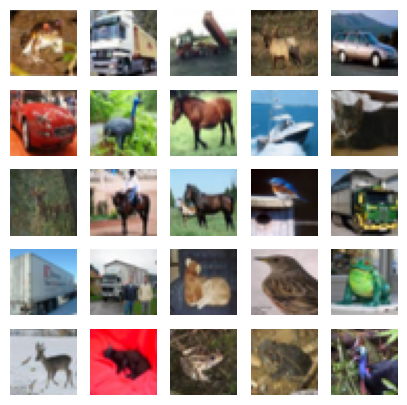

In [15]:

#visualize a few images
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

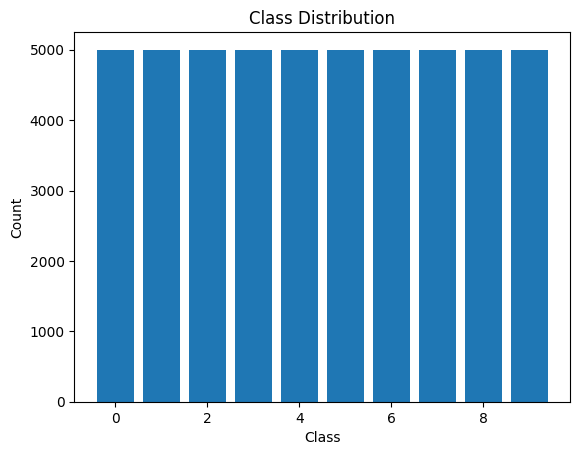

In [16]:
#class distribution
unique,counts = np.unique(y_train,return_counts=True)
plt.bar(unique,counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [17]:

#data normalization

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

#data splitting (we will split a portion for the training set for validation)
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]
     

In [18]:

#one hot encoding
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [19]:

#building CNN model
model = Sequential([
                    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                     MaxPooling2D((2,2)),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dropout(0.5),
                    Dense(10,activation='softmax')
])
     

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
#training the CNN
history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2949 - loss: 1.9041 - val_accuracy: 0.5348 - val_loss: 1.3191
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4982 - loss: 1.3915 - val_accuracy: 0.5722 - val_loss: 1.2194
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5672 - loss: 1.2359 - val_accuracy: 0.6214 - val_loss: 1.0703
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5934 - loss: 1.1386 - val_accuracy: 0.6412 - val_loss: 1.0211
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6228 - loss: 1.0654 - val_accuracy: 0.6467 - val_loss: 0.9994
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6434 - loss: 1.0120 - val_accuracy: 0.6682 - val_loss: 0.9486
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6628 - loss: 0.9553 - val_accuracy: 0.6713 - val_loss: 0.9267
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6770 - loss: 0.9150 - 

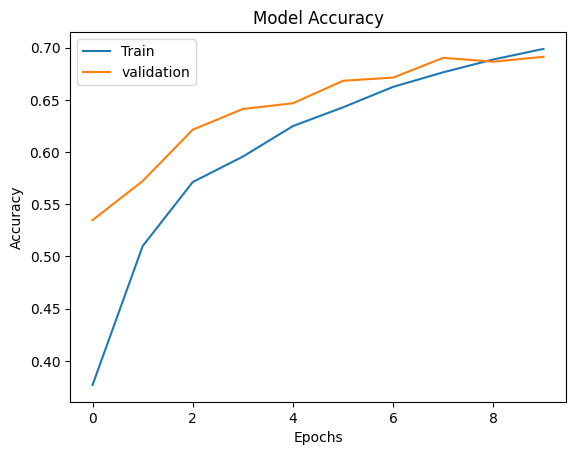

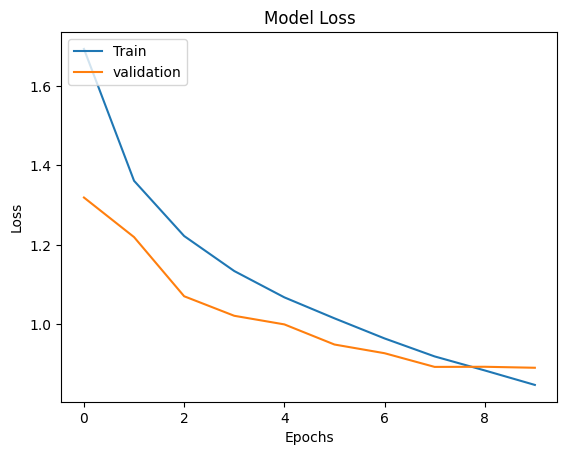

In [22]:
#plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [23]:
#evaluating the model
loss,accuracy = model.evaluate(X_test,y_test)
print(f'Test Loss:{loss:.4f}')
print(f'Test Accuracy:{accuracy:4f}')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6883 - loss: 0.8935
Test Loss:0.9000
Test Accuracy:0.688300
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1000
           1       0.85      0.78      0.81      1000
           2       0.61      0.48      0.54      1000
           3       0.59      0.43      0.50      1000
           4       0.55      0.69      0.61      1000
           5       0.63      0.57      0.60      1000
           6       0.68      0.82      0.75      1000
           7       0.75      0.73      0.74      1000
           8       0.78      0.81      0.79      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



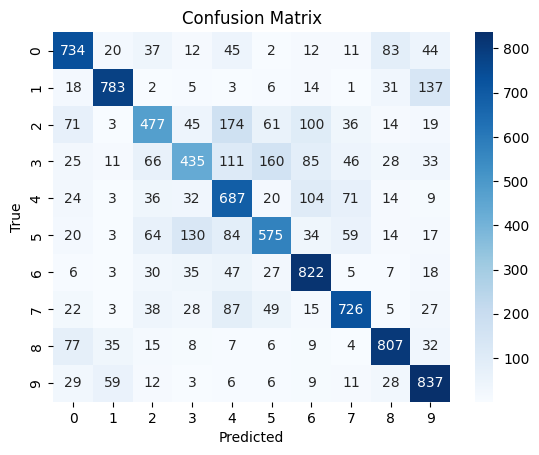

In [24]:
#visualization : Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()